In [1]:
%matplotlib nbagg

/Users/susanclark/dedalus_upgraded/dedalus/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import logging

root = logging.root
for h in root.handlers:
    h.setLevel("INFO")

In [3]:
import dedalus.public as de
import numpy as np
import matplotlib.pylab as plt

In [4]:
plt.style.use('ggplot')

In [62]:
nr1 = 128
r1 = de.Chebyshev('r', nr1, interval=(95, 105))
d1 = de.Domain([r1])

nr2 = 164
r2 = de.Chebyshev('r', nr2, interval=(95, 105))
d2 = de.Domain([r2])

In [63]:
# critical parameters
Rm = 4.9 #4.879
iRm = 1.0/Rm
Pm = 0.001
Re = Rm/Pm
iR = 1.0/Re
q = 1.5
Q = 0.748
beta = 25.0

In [64]:
widegap = de.EVP(d1,['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')
widegap.parameters['Q'] = Q
widegap.parameters['iR'] = iR
widegap.parameters['iRm'] = iRm
widegap.parameters['q'] = q
widegap.parameters['beta'] = beta

2016-04-20 15:42:42,985 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


Linear widegap MRI equations multiplied by $r^4$

$\left[\begin{matrix}- 3.0 i \Omega_{0} Q r^{4} r^{- q} u{\left (t,r,z \right )} - \frac{1.0 r^{3}}{R_{e}} Q^{4} \psi{\left (t,r,z \right )} + \frac{2.0 i}{\beta} Q^{3} r^{3} A{\left (t,r,z \right )} + \frac{2.0 d_{r}^{2}}{R_{e}} Q^{2} r^{3} \psi{\left (t,r,z \right )} - \frac{2.0 d_{r}}{R_{e}} Q^{2} r^{2} \psi{\left (t,r,z \right )} - \frac{2.0 i}{\beta} Q d_{r}^{2} r^{3} A{\left (t,r,z \right )} + \frac{2.0 i}{\beta} Q d_{r} r^{2} A{\left (t,r,z \right )} - \frac{d_{r}^{4} r^{3}}{R_{e}} \psi{\left (t,r,z \right )} + \frac{2 d_{r}^{3}}{R_{e}} r^{2} \psi{\left (t,r,z \right )} - \frac{3 r}{R_{e}} d_{r}^{2} \psi{\left (t,r,z \right )} + \frac{3 d_{r}}{R_{e}} \psi{\left (t,r,z \right )}\\- 1.0 i \Omega_{0} Q q r^{3} r^{- q} \psi{\left (t,r,z \right )} + 4.0 i \Omega_{0} Q r^{3} r^{- q} \psi{\left (t,r,z \right )} + \frac{1.0 r^{4}}{R_{e}} Q^{2} u{\left (t,r,z \right )} - \frac{2.0 i}{\beta} Q r^{4} B{\left (t,r,z \right )} - \frac{d_{r}^{2} r^{4}}{R_{e}} u{\left (t,r,z \right )} - \frac{d_{r} r^{3}}{R_{e}} u{\left (t,r,z \right )} + \frac{r^{3}}{R_{e}} u{\left (t,r,z \right )}\\\frac{1.0 r^{4}}{R_{m}} Q^{2} A{\left (t,r,z \right )} - 1.0 i Q r^{4} \psi{\left (t,r,z \right )} - \frac{d_{r}^{2} r^{4}}{R_{m}} A{\left (t,r,z \right )} + \frac{d_{r} r^{3}}{R_{m}} A{\left (t,r,z \right )}\\1.0 i \Omega_{0} Q q r^{3} r^{- q} A{\left (t,r,z \right )} - 2.0 i \Omega_{0} Q r^{3} r^{- q} A{\left (t,r,z \right )} + \frac{1.0 r^{4}}{R_{m}} Q^{2} B{\left (t,r,z \right )} - 1.0 i Q r^{4} u{\left (t,r,z \right )} - \frac{d_{r}^{2} r^{4}}{R_{m}} B{\left (t,r,z \right )} - \frac{d_{r} r^{3}}{R_{m}} B{\left (t,r,z \right )} + \frac{r^{2}}{R_{m}} B{\left (t,r,z \right )}\end{matrix}\right]$ 
+ $\left[\begin{matrix}- 1.0 Q^{2} r^{3} \sigma \psi{\left (t,r,z \right )} + d_{r}^{2} r^{3} \sigma \psi{\left (t,r,z \right )} - d_{r} r^{2} \sigma \psi{\left (t,r,z \right )}\\r^{4} \sigma u{\left (t,r,z \right )}\\r^{4} \sigma A{\left (t,r,z \right )}\\r^{4} \sigma B{\left (t,r,z \right )}\end{matrix}\right]$
= 0

In [65]:
widegap.add_equation("sigma*(-1*Q**2*r**3*psi + r**3*psirr - r**2*psir) - 3*1j*Q*r**(4 - q)*u - iR*r**3*Q**4*psi + (2/beta)*1j*Q**3*r**3*A + iR*2*Q**2*r**3*psirr - iR*2*Q**2*r**2*psir - (2/beta)*1j*Q*r**3*dr(Ar) + (2/beta)*1j*Q*r**2*Ar - iR*r**3*dr(psirrr) + 2*iR*r**2*psirrr - iR*3*r*psirr + iR*3*psir = 0")
widegap.add_equation("sigma*(r**4*u) - 1j*Q*q*r**(3 - q)*psi + 4*1j*Q*r**(3 - q)*psi + iR*r**4*Q**2*u - (2/beta)*1j*Q*r**4*B - iR*r**4*dr(ur) - iR*r**3*ur + iR*r**3*u = 0")
widegap.add_equation("sigma*(r**4*A) + iRm*r**4*Q**2*A - 1j*Q*r**4*psi - iRm*r**4*dr(Ar) + iRm*r**3*Ar = 0")
widegap.add_equation("sigma*(r**4*B) + 1j*Q*q*r**(3 - q)*A - 2*1j*Q*r**(3 - q)*A + iRm*r**4*Q**2*B - 1j*Q*r**4*u - iRm*r**4*dr(Br) - iRm*r**3*Br + iRm*r**2*B = 0")

In [66]:
widegap.add_equation("dr(psi) - psir = 0")
widegap.add_equation("dr(psir) - psirr = 0")
widegap.add_equation("dr(psirr) - psirrr = 0")
widegap.add_equation("dr(u) - ur = 0")
widegap.add_equation("dr(A) - Ar = 0")
widegap.add_equation("dr(B) - Br = 0")

In [67]:
widegap.add_bc('left(u) = 0')
widegap.add_bc('right(u) = 0')
widegap.add_bc('left(psi) = 0')
widegap.add_bc('right(psi) = 0')
widegap.add_bc('left(A) = 0')
widegap.add_bc('right(A) = 0')
widegap.add_bc('left(psi + r*psir) = 0')
widegap.add_bc('right(psi + r*psir) = 0')
widegap.add_bc('left(B + r*Br) = 0')
widegap.add_bc('right(B + r*Br) = 0')

In [68]:
solver = widegap.build_solver()

In [69]:
widegap2 = de.EVP(d2,['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')
widegap2.parameters['Q'] = Q
widegap2.parameters['iR'] = iR
widegap2.parameters['iRm'] = iRm
widegap2.parameters['q'] = q
widegap2.parameters['beta'] = beta
widegap2.add_equation("sigma*(-1*Q**2*r**3*psi + r**3*psirr - r**2*psir) - 3*1j*Q*r**(4 - q)*u - iR*r**3*Q**4*psi + (2/beta)*1j*Q**3*r**3*A + iR*2*Q**2*r**3*psirr - iR*2*Q**2*r**2*psir - (2/beta)*1j*Q*r**3*dr(Ar) + (2/beta)*1j*Q*r**2*Ar - iR*r**3*dr(psirrr) + 2*iR*r**2*psirrr - iR*3*r*psirr + iR*3*psir = 0")
widegap2.add_equation("sigma*(r**4*u) - 1j*Q*q*r**(3 - q)*psi + 4*1j*Q*r**(3 - q)*psi + iR*r**4*Q**2*u - (2/beta)*1j*Q*r**4*B - iR*r**4*dr(ur) - iR*r**3*ur + iR*r**3*u = 0")
widegap2.add_equation("sigma*(r**4*A) + iRm*r**4*Q**2*A - 1j*Q*r**4*psi - iRm*r**4*dr(Ar) + iRm*r**3*Ar = 0")
widegap2.add_equation("sigma*(r**4*B) + 1j*Q*q*r**(3 - q)*A - 2*1j*Q*r**(3 - q)*A + iRm*r**4*Q**2*B - 1j*Q*r**4*u - iRm*r**4*dr(Br) - iRm*r**3*Br + iRm*r**2*B = 0")
widegap2.add_equation("dr(psi) - psir = 0")
widegap2.add_equation("dr(psir) - psirr = 0")
widegap2.add_equation("dr(psirr) - psirrr = 0")
widegap2.add_equation("dr(u) - ur = 0")
widegap2.add_equation("dr(A) - Ar = 0")
widegap2.add_equation("dr(B) - Br = 0")
widegap2.add_bc('left(u) = 0')
widegap2.add_bc('right(u) = 0')
widegap2.add_bc('left(psi) = 0')
widegap2.add_bc('right(psi) = 0')
widegap2.add_bc('left(A) = 0')
widegap2.add_bc('right(A) = 0')
widegap2.add_bc('left(psi + r*psir) = 0')
widegap2.add_bc('right(psi + r*psir) = 0')
widegap2.add_bc('left(B + r*Br) = 0')
widegap2.add_bc('right(B + r*Br) = 0')

solver2 = widegap2.build_solver()


2016-04-20 15:42:44,559 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


In [70]:
solver.solve(solver.pencils[0])
solver2.solve(solver2.pencils[0])

In [71]:
ev1 = solver.eigenvalues
ev2 = solver2.eigenvalues
goodeigs, goodeigs_indices = discard_spurious_eigenvalues(ev1, ev2)
goodeigs2, goodeigs_indices2 = discard_spurious_eigenvalues(ev2, ev1)

In [72]:
marginal_mode_index = np.where(goodeigs.real == np.nanmax(goodeigs.real))[0][0]

In [73]:
print(marginal_mode_index)
print(int(goodeigs_indices[marginal_mode_index]))
use_indx = int(goodeigs_indices[marginal_mode_index])

155
482


/Users/susanclark/dedalus_upgraded/dedalus/lib/python3.4/site-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/Users/susanclark/dedalus_upgraded/dedalus/lib/python3.4/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [74]:
marginal_mode_index2 = np.where(goodeigs2.real == np.nanmax(goodeigs2.real))[0][0]
use_indx2 = int(goodeigs_indices2[marginal_mode_index2])
solver2.set_state(use_indx2)
data2 = solver2.state

/Users/susanclark/dedalus_upgraded/dedalus/lib/python3.4/site-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [75]:
rr  = r1.grid()
evector = solver.eigenvectors[use_indx]

In [82]:
solver.set_state(use_indx)
data = solver.state
psi = data['psi']

print(ev1[use_indx])

print(ev1[np.where(goodeigs.real > 0)])

(-0.0134761837513+0.000357311074657j)
[]


156 [ -9.32505576e+01 +1.19989873e-14j  -9.32505369e+01 +2.38575535e-14j
  -8.52138152e+01 -3.17376430e-14j  -8.00574368e+01 -4.30778336e-14j
  -8.00574168e+01 -6.78670833e-14j  -7.50621510e+01 +1.11859191e-13j
  -7.26249417e+01 +1.14858835e-14j  -7.02280178e+01 +9.03237071e-14j
  -6.78713950e+01 -2.08078200e-14j  -6.32789598e+01 -6.42213566e-14j
  -6.32789394e+01 +1.78707595e-14j  -5.88476552e+01 -1.18848298e-14j
  -5.45774607e+01 -3.31974997e-15j  -5.04684360e+01 -2.06280891e-14j
  -4.27337277e+01 +4.75160986e-14j  -4.09007558e+01 -6.45681146e-14j
  -3.73556507e+01 -1.07528137e-14j  -3.73556304e+01 +7.27684057e-14j
  -3.39716669e+01 +3.79074865e-14j  -3.39716464e+01 +6.54749753e-15j
  -3.07487802e+01 +7.47594246e-15j  -2.76870474e+01 +2.05648297e-14j
  -2.76870269e+01 -9.45993872e-15j  -1.49563985e-01 -1.50895830e-01j
  -1.49563985e-01 +1.50895830e-01j  -1.48926067e-01 -1.51164492e-01j
  -1.48926067e-01 +1.51164492e-01j  -9.94216822e-02 -4.46911967e-15j
  -9.87297642e-02 -1.87127602e

<IPython.core.display.Javascript object>


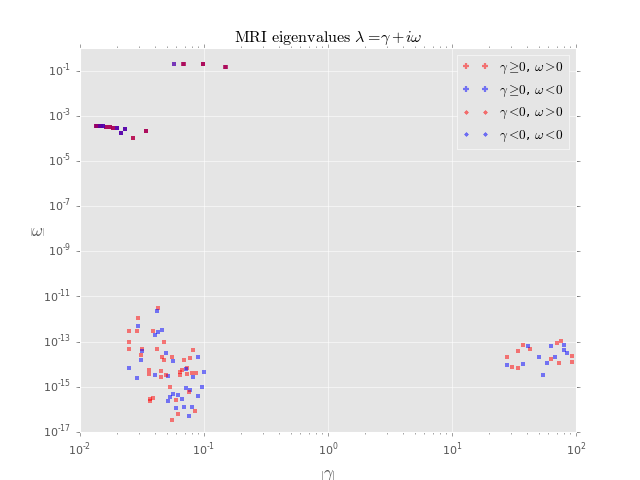

Number of positive real parts 0


In [77]:
print(len(goodeigs), goodeigs)
ploteigs(goodeigs)

<IPython.core.display.Javascript object>


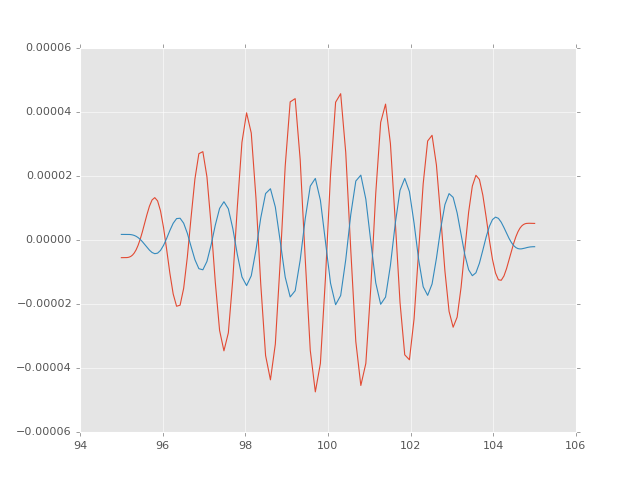

In [78]:
plt.figure()
plt.plot(rr, (data['B']['g']).real, label='real')
plt.plot(rr, (data['B']['g']).imag, label='imag')

<IPython.core.display.Javascript object>


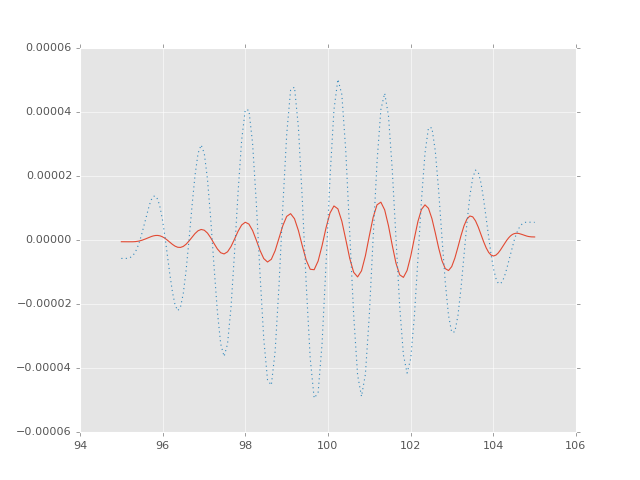

In [79]:
plt.figure()
plt.plot(r2.grid(), (data2['B']['g']).real, label='real')
plt.plot(r2.grid(), (data2['B']['g']).imag, ':', label='imag',)

In [80]:
    def discard_spurious_eigenvalues(lambda1, lambda2):
    
        """
        lambda1 :: eigenvalues from low res run
        lambda2 :: eigenvalues from high res run
        
        Solves the linear eigenvalue problem for two different resolutions.
        Returns trustworthy eigenvalues using nearest delta, from Boyd chapter 7.
        """

        # Reverse engineer correct indices to make unsorted list from sorted
        reverse_lambda1_indx = np.arange(len(lambda1)) 
        reverse_lambda2_indx = np.arange(len(lambda2))
    
        lambda1_and_indx = np.asarray(list(zip(lambda1, reverse_lambda1_indx)))
        lambda2_and_indx = np.asarray(list(zip(lambda2, reverse_lambda2_indx)))
        
        # remove nans
        lambda1_and_indx = lambda1_and_indx[np.isfinite(lambda1)]
        lambda2_and_indx = lambda2_and_indx[np.isfinite(lambda2)]
    
        # Sort lambda1 and lambda2 by real parts
        lambda1_and_indx = lambda1_and_indx[np.argsort(lambda1_and_indx[:, 0].real)]
        lambda2_and_indx = lambda2_and_indx[np.argsort(lambda2_and_indx[:, 0].real)]
        
        lambda1_sorted = lambda1_and_indx[:, 0]
        lambda2_sorted = lambda2_and_indx[:, 0]
    
        # Compute sigmas from lower resolution run (gridnum = N1)
        sigmas = np.zeros(len(lambda1_sorted))
        sigmas[0] = np.abs(lambda1_sorted[0] - lambda1_sorted[1])
        sigmas[1:-1] = [0.5*(np.abs(lambda1_sorted[j] - lambda1_sorted[j - 1]) + np.abs(lambda1_sorted[j + 1] - lambda1_sorted[j])) for j in range(1, len(lambda1_sorted) - 1)]
        sigmas[-1] = np.abs(lambda1_sorted[-2] - lambda1_sorted[-1])

        if not (np.isfinite(sigmas)).all():
            print("WARNING: at least one eigenvalue spacings (sigmas) is non-finite (np.inf or np.nan)!")
    
        # Nearest delta
        delta_near = np.array([np.nanmin(np.abs(lambda1_sorted[j] - lambda2_sorted)/sigmas[j]) for j in range(len(lambda1_sorted))])
    
        # Discard eigenvalues with 1/delta_near < 10^6
        lambda1_and_indx = lambda1_and_indx[np.where((1.0/delta_near) > 1E6)]
        #print(lambda1_and_indx)
        
        lambda1 = lambda1_and_indx[:, 0]
        indx = lambda1_and_indx[:, 1]
        
        return lambda1, indx

In [16]:
def ploteigs(goodevals):

    """
    Plot real vs imaginary parts of eigenvalues.
    """

    fig = plt.figure()
    
    # Color is sign of imaginary part
    colors = ["blue" for i in range(len(goodevals))]
    imagpos = np.where(goodevals.imag >= 0)
    for p in imagpos[0]:
        colors[p] = "red"
  
    # Symbol is sign of real part
    symbols = ["." for i in range(len(goodevals))]
    thickness = np.zeros(len(goodevals))
    realpos = np.where(goodevals.real >= 0)
    for p in realpos[0]:
        symbols[p] = "+"
        thickness[p] = 2
    
    print("Number of positive real parts", len(realpos[0]))
    
    for x, y, c, s, t in zip(np.abs(goodevals.real), np.abs(goodevals.imag), colors, symbols, thickness):
        plt.plot(x, y, s, c=c, alpha = 0.5, ms = 8, mew = t)
        
    # Dummy plot for legend
    plt.plot(0, 0, '+', c = "red", alpha = 0.5, mew = 2, label = r"$\gamma \geq 0$, $\omega > 0$")
    plt.plot(0, 0, '+', c = "blue", alpha = 0.5, mew = 2, label = r"$\gamma \geq 0$, $\omega < 0$")
    plt.plot(0, 0, '.', c = "red", alpha = 0.5, label = r"$\gamma < 0$, $\omega > 0$")
    plt.plot(0, 0, '.', c = "blue", alpha = 0.5, label = r"$\gamma < 0$, $\omega < 0$")
        
    plt.legend()
        
    plt.loglog()
    plt.xlabel(r"$\left|\gamma\right|$", size = 15)
    plt.ylabel(r"$\left|\omega\right|$", size = 15, rotation = 0)
    plt.title(r"$\mathrm{MRI}$ $\mathrm{eigenvalues}$ $\lambda = \gamma + i \omega$")